<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Exploratory Data Analysis of Cargo Theft</h1>

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('CARGO_THEFT_2013_2022.csv')

data source: https://cde.ucr.cjis.gov/LATEST/webapp/#

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [3]:
data.head(5)

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,population_group_code,population_group_desc,offense_code,offense_name,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,victim_type_name,location_code,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,1B,"Cities from 500,000 thru 999,999",240,Motor Vehicle Theft,Black or African American,Not Hispanic or Latino,NaN,M,I,Individual,0,Not Specified,12,Handgun,8.00,8.00,Consumable Goods,10000.00,10000,True,2012-07-25
1,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,1B,"Cities from 500,000 thru 999,999",240,Motor Vehicle Theft,Black or African American,Not Hispanic or Latino,NaN,M,B,Business,0,Not Specified,12,Handgun,8.00,8.00,Consumable Goods,10000.00,10000,True,2012-07-25
2,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,1B,"Cities from 500,000 thru 999,999",23H,All Other Larceny,Black or African American,Not Hispanic or Latino,NaN,M,I,Individual,0,Not Specified,12,Handgun,8.00,8.00,Consumable Goods,10000.00,10000,True,2012-07-25
3,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,1B,"Cities from 500,000 thru 999,999",23H,All Other Larceny,Black or African American,Not Hispanic or Latino,NaN,M,B,Business,0,Not Specified,12,Handgun,8.00,8.00,Consumable Goods,10000.00,10000,True,2012-07-25
4,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,1B,"Cities from 500,000 thru 999,999",120,Robbery,Black or African American,Not Hispanic or Latino,NaN,M,I,Individual,5,Commercial/Office Building,12,Handgun,8.00,8.00,Consumable Goods,10000.00,10000,True,2012-07-25


In [4]:
data.columns

Index(['data_year', 'ori', 'pub_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'county_name', 'region_name', 'population_group_code',
       'population_group_desc', 'offense_code', 'offense_name',
       'offender_race', 'offender_ethnicity', 'offender_age', 'offender_sex',
       'victim_type_code', 'victim_type_name', 'location_code',
       'location_name', 'weapon_code', 'weapon_name', 'prop_desc_code',
       'prop_desc_code.1', 'prop_desc_name', 'stolen_value', 'recovered_value',
       'recovered_flag', 'date_recovered'],
      dtype='object')

In [5]:
data.shape

(193274, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193274 entries, 0 to 193273
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year              193274 non-null  int64  
 1   ori                    193274 non-null  object 
 2   pub_agency_name        193274 non-null  object 
 3   pub_agency_unit        2202 non-null    object 
 4   agency_type_name       193274 non-null  object 
 5   state_abbr             193274 non-null  object 
 6   state_name             193274 non-null  object 
 7   division_name          193274 non-null  object 
 8   county_name            193274 non-null  object 
 9   region_name            193274 non-null  object 
 10  population_group_code  193232 non-null  object 
 11  population_group_desc  193232 non-null  object 
 12  offense_code           193274 non-null  object 
 13  offense_name           193274 non-null  object 
 14  offender_race          108063 non-nu

In [7]:
data.describe()

,data_year,offender_age,location_code,prop_desc_code,prop_desc_code.1,stolen_value,recovered_value
count,193274.00,99481.00,193274.00,193203.00,193203.00,192801.00,193274.00
mean,2018.92,24.40,18.75,34.68,34.68,11998.35,1692.22
std,2.84,17.63,8.94,27.35,27.35,1339323.74,24291.97
min,2012.00,0.00,0.00,1.00,1.00,0.00,0.00
25%,2017.00,14.00,13.00,13.00,13.00,10.00,0.00
50%,2020.00,25.00,20.00,25.00,25.00,210.00,0.00
75%,2021.00,36.00,20.00,66.00,66.00,1200.00,0.00
max,2022.00,99.00,58.00,99.00,99.00,514000000.00,3000000.00


<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Correct invalid column datatype </h4>

In [8]:
# Convert date_recovered to pandas datetime datatype 
data['date_recovered'] = pd.to_datetime(data['date_recovered'])

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Drop Columns with too many null Values</h4>

In [9]:
null_cols = ['pub_agency_unit']

In [10]:
data = data.drop(columns=null_cols)

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

In [11]:
import matplotlib.pyplot as plt
# import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

sns.set(style="whitegrid")

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">How does the number of incidents change over the years?</h4>

In [12]:
data['data_year'].unique()

array([2012, 2013, 2014, 2016, 2015, 2017, 2019, 2020, 2021, 2018, 2022],
      dtype=int64)

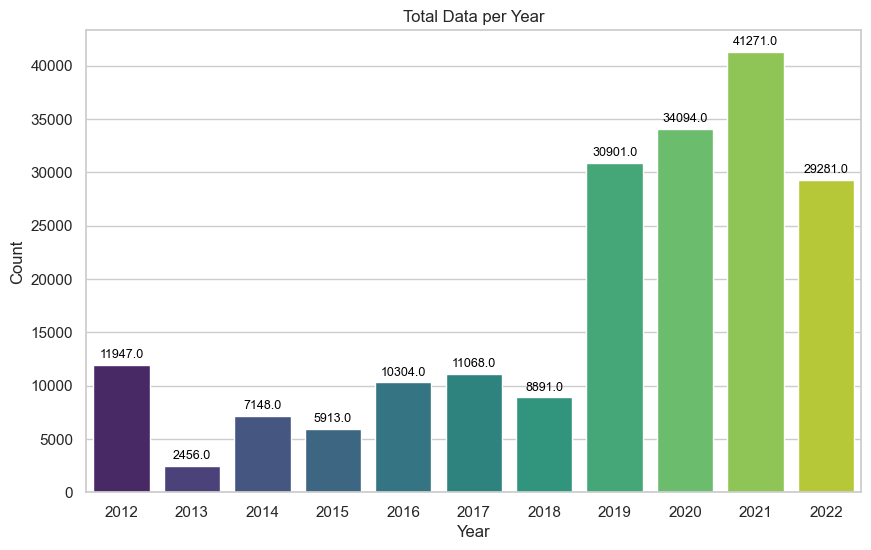

In [13]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='data_year', data=data, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Data per Year')

plt.show()

The data contain approximately 193 thousand records of cargo thefts which dates from 2012 to 2022 with the highest number of thefts committed in 2021 (41 thousand). It might be worthwhile further investing how the number of crime suddenly skyrockets between 2018 and 2019.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">What are the most common offenses?</h4>

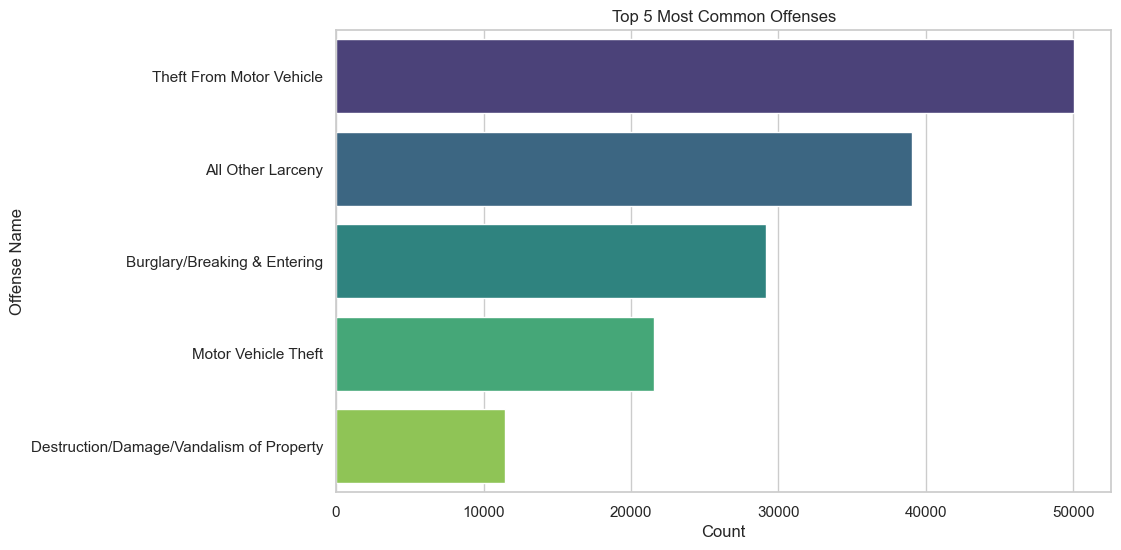

In [14]:
top_offenses = data['offense_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_offenses, y=top_offenses.index, palette='viridis')

plt.xlabel('Count')
plt.ylabel('Offense Name')
plt.title('Top 5 Most Common Offenses')

plt.show()

The most common type of offense committed is theft from motor vehicle.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">How does the distribution of offenses vary across different locations or demographic groups?</h4>

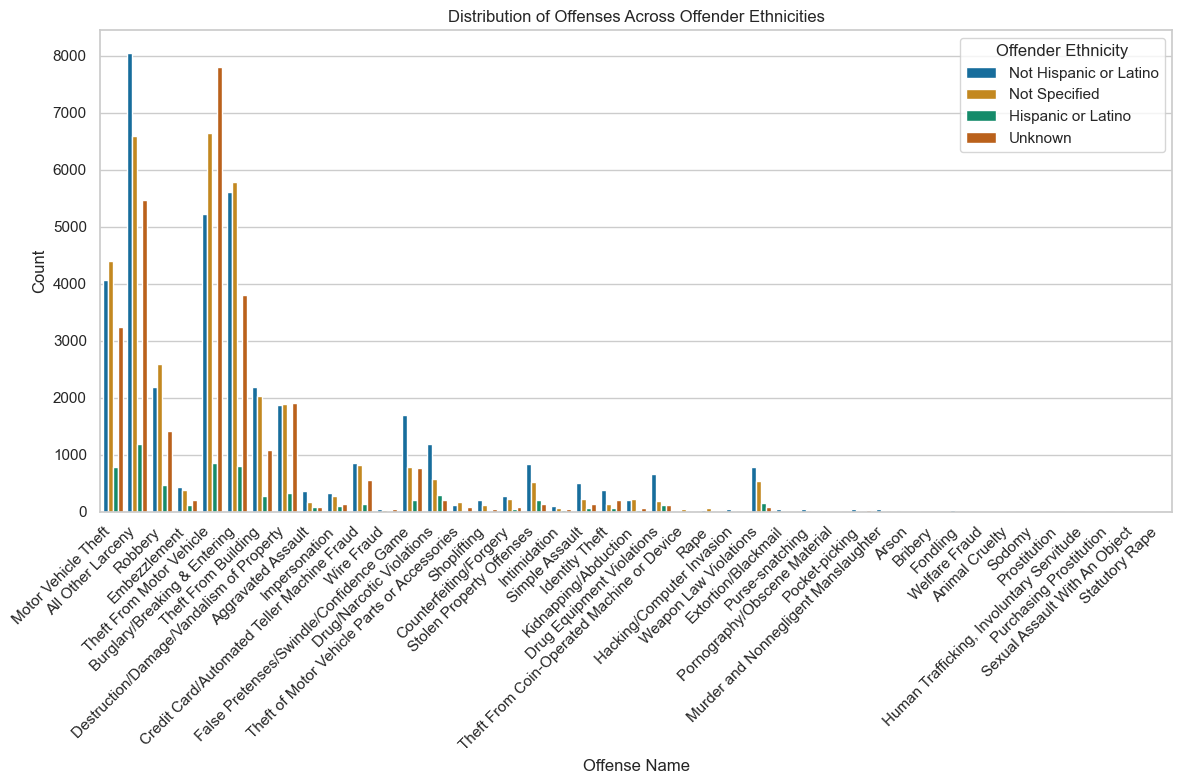

In [15]:
plt.figure(figsize=(12, 8))

# Use countplot to show the distribution of offenses across offender ethnicities
sns.countplot(x='offense_name', hue='offender_ethnicity', data=data, palette='colorblind')

# Add labels and title
plt.xlabel('Offense Name')
plt.ylabel('Count')
plt.title('Distribution of Offenses Across Offender Ethnicities')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Offender Ethnicity')
plt.tight_layout()
plt.show()


People from Non Hispanic and Latin ethnicity group appear to have committed the highest number of crime

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">What is the performance of enforcement agencies in terms of recovered items across the year?</h4>

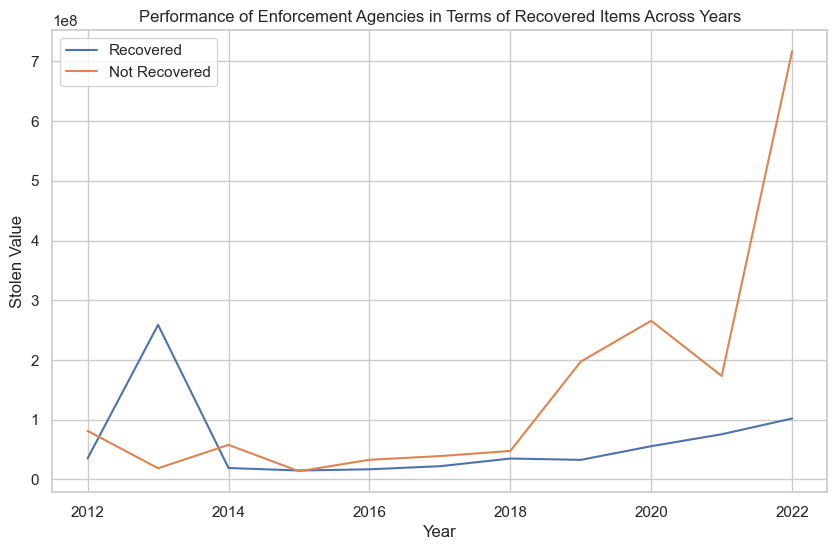

In [16]:
plt.figure(figsize=(10, 6))

# Filter data for recovered and not recovered items
recovered_data = data[data['recovered_flag'] == True]
not_recovered_data = data[data['recovered_flag'] == False]

# Line chart for the number of recovered items per year
sns.lineplot(x='data_year', y='stolen_value', data=recovered_data.groupby('data_year').sum().reset_index(), label='Recovered')

# Line chart for the number of not recovered items per year
sns.lineplot(x='data_year', y='stolen_value', data=not_recovered_data.groupby('data_year').sum().reset_index(), label='Not Recovered')

plt.xlabel('Year')
plt.ylabel('Stolen Value')
plt.title('Performance of Enforcement Agencies in Terms of Recovered Items Across Years')

plt.legend()

plt.show()

Across the years, it seems the performance of enforcement agencies has not been effective in terms of recovering stolen items as the number of recovered items keep decreasing while number of unrecovered items keep increasing drastically.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Which gender is most involved in crime?</h4>

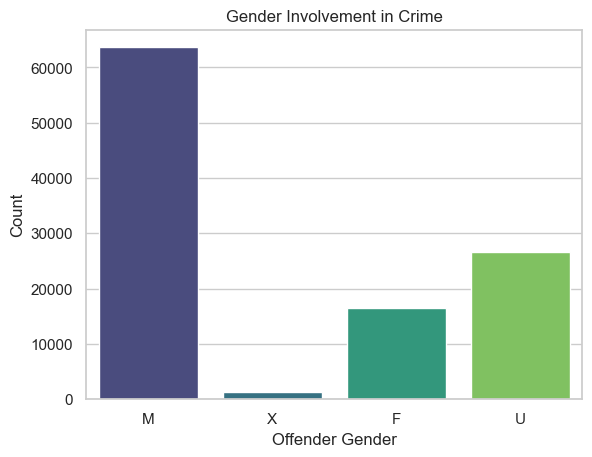

In [17]:
# Create a countplot for offender gender
sns.countplot(x='offender_sex', data=data, palette='viridis')

plt.xlabel('Offender Gender')
plt.ylabel('Count')
plt.title('Gender Involvement in Crime')

plt.show()

The male gender is more involved in crime than all the other gender combined.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">What is the distribution of top crimes across offender race?</h4>

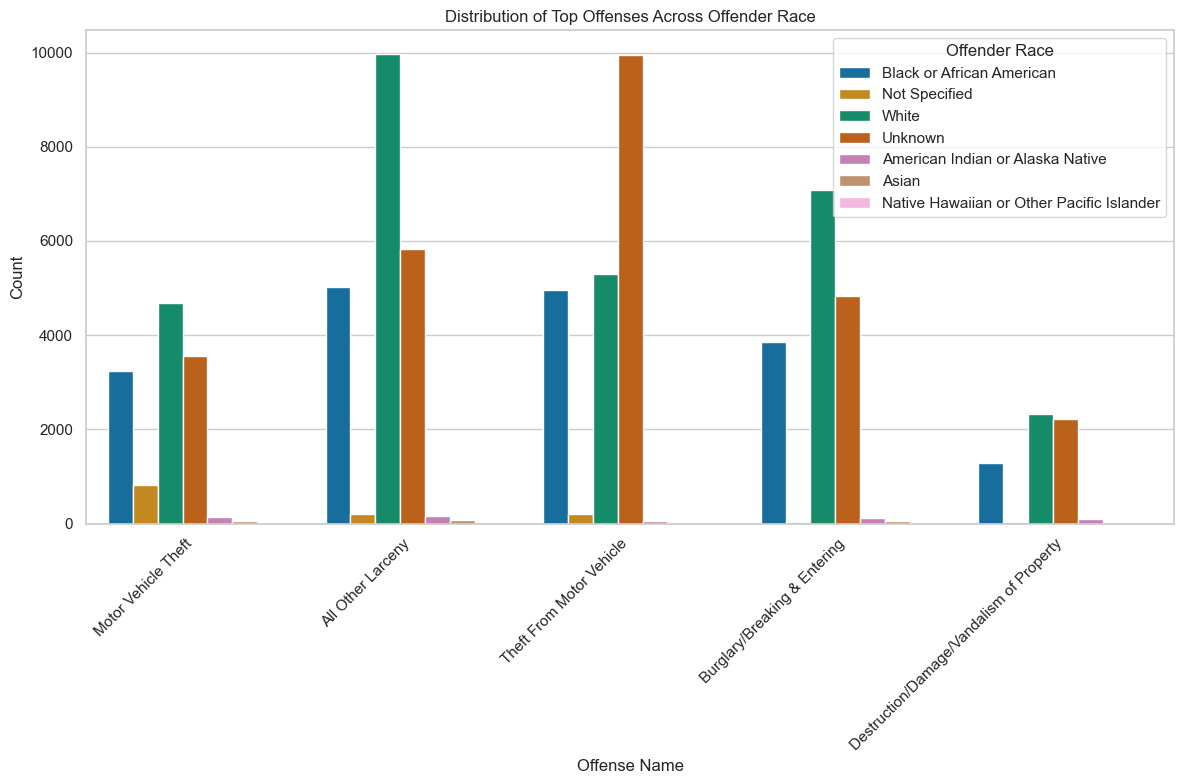

In [18]:
plt.figure(figsize=(12, 8))

# Identify the top 5 crimes
top_crimes = data['offense_name'].value_counts().head(5).index

# Filter the dataset for the top 5 crimes
data_top5 = data[data['offense_name'].isin(top_crimes)]

# Use countplot to show the distribution of top offenses across offender Race
sns.countplot(x='offense_name', hue='offender_race', data=data_top5, palette='colorblind')

# Add labels and title
plt.xlabel('Offense Name')
plt.ylabel('Count')
plt.title('Distribution of Top Offenses Across Offender Race')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Offender Race')
plt.tight_layout()
plt.show()


It can be observed that White people committed more crimes than black people across all the categories of top crimes.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Is there a correlation between the type of offense(top offense) and the weapon used?</h4>

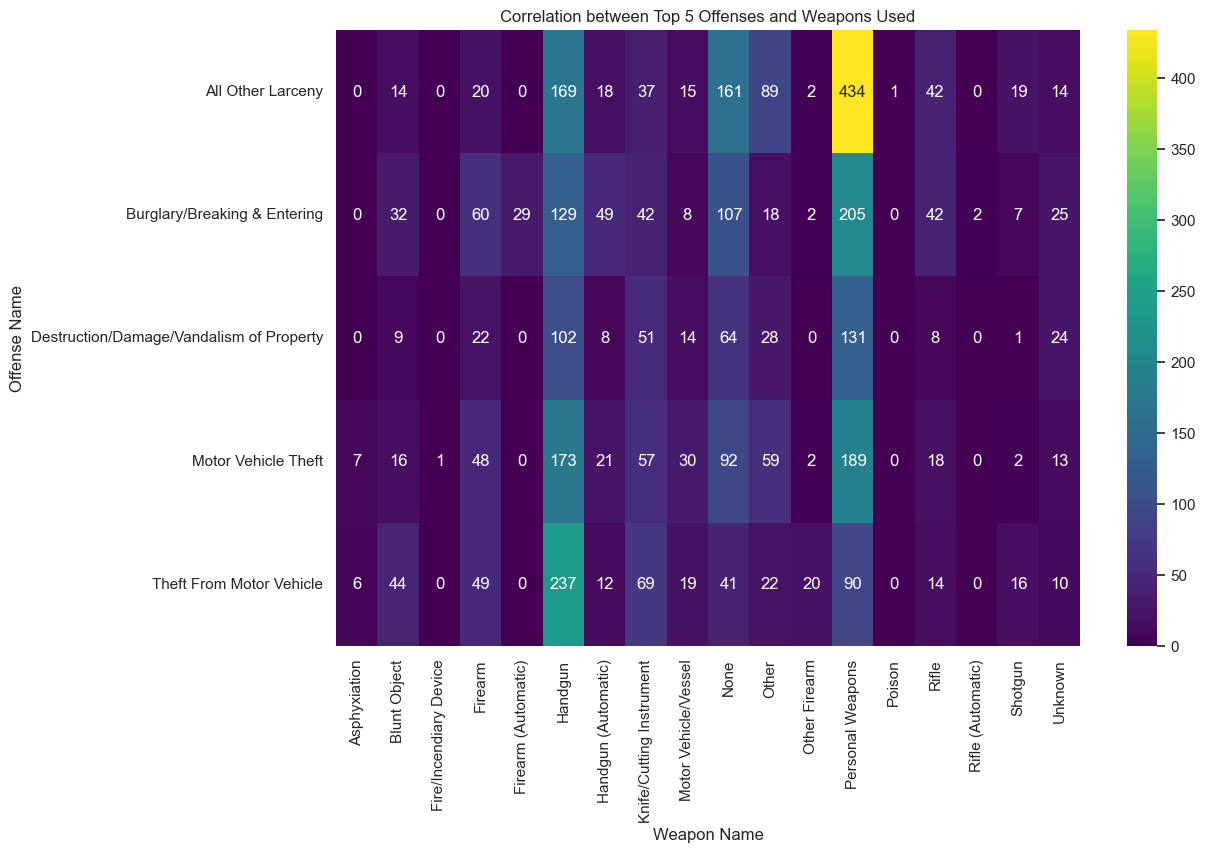

In [19]:
plt.figure(figsize=(12, 8))

# Create a contingency table
contingency_table = pd.crosstab(data_top5['offense_name'], data_top5['weapon_name'])

# Create a heatmap
sns.heatmap(contingency_table, cmap='viridis', annot=True, fmt='d')

# Add labels and title
plt.xlabel('Weapon Name')
plt.ylabel('Offense Name')
plt.title('Correlation between Top 5 Offenses and Weapons Used')

# Show the plot
plt.show()


Another crucial observation is that people who commit crimes tend to use Handgun and Personal Weapons.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">How much of stolen value is recovered per year?</h4>

<Figure size 1200x800 with 0 Axes>

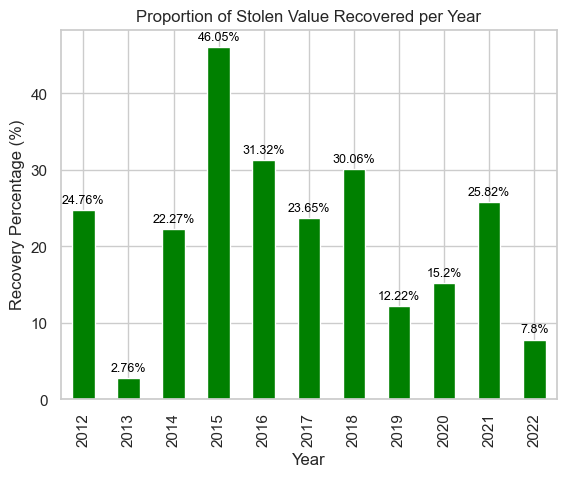

In [20]:
plt.figure(figsize=(12, 8))

# Group the data by year and calculate the sum of stolen and recovered values
yearly_recovery = data.groupby('data_year')[['stolen_value', 'recovered_value']].sum().reset_index()

# Calculate the proportion of stolen value recovered
yearly_recovery['recovery_percentage'] = (yearly_recovery['recovered_value'] / yearly_recovery['stolen_value']) * 100

# Plot the bar chart
ax = yearly_recovery.plot(x='data_year', y='recovery_percentage', kind='bar', color='green', legend=False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Recovery Percentage (%)')
plt.title('Proportion of Stolen Value Recovered per Year')

# Add the corresponding numbers on each bar
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
# Show the plot
plt.show()

In 2015, law enforcement agencies experienced their most successful year in terms of the value of recovered items.